In [1]:
#what was the change in price of the stock overtime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

#reading stock data from yahoo
from pandas_datareader.data import DataReader

#for time stamps
from datetime import datetime

In [4]:
#tech stocks for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#set up end and start times for data grab
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

#looping through yahoo finance data and setting as a dataframe
for stock in tech_list:
    #set df as a stock ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-04,3198.209961,3158.760010,3198.209961,3162.580078,2913600.0,3162.580078,AMAZON
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2751300.0,3158.000000,AMAZON
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300.0,3177.290039,AMAZON
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800.0,3104.199951,AMAZON
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200.0,3101.489990,AMAZON
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3064700.0,3116.419922,AMAZON
2020-12-14,3190.469971,3126.000000,3143.000000,3156.969971,4155800.0,3156.969971,AMAZON
2020-12-15,3188.500000,3130.489990,3181.010010,3165.120117,3323700.0,3165.120117,AMAZON
2020-12-16,3247.000000,3163.679932,3176.010010,3240.959961,4420900.0,3240.959961,AMAZON


In [6]:
#summary stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,94.360561,91.703140,93.001427,93.103622,1.565742e+08,92.777499
std,21.356630,20.796698,21.247031,21.062243,7.124009e+07,21.203792
min,57.125000,53.152500,57.020000,56.092499,2.853200e+07,55.744217
25%,75.887499,74.166250,74.991875,75.105001,1.096560e+08,74.506163
50%,88.994999,87.538750,88.088749,88.114998,1.379199e+08,87.804924
75%,116.330002,113.423752,114.965002,115.032501,1.870393e+08,114.834385
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-07-17 to 2020-07-17
Data columns (total 7 columns):
High            254 non-null float64
Low             254 non-null float64
Open            254 non-null float64
Close           254 non-null float64
Volume          254 non-null float64
Adj Close       254 non-null float64
company_name    254 non-null object
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


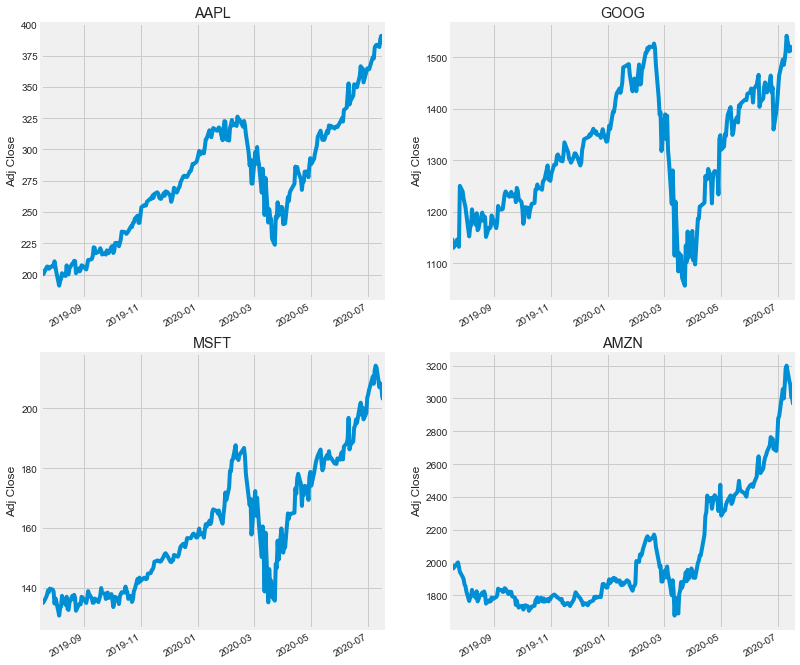

In [18]:
#historical view of the closing price

plt.figure(figsize=(12,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")

In [16]:
import sys

In [19]:
#plot of total volume of stock being traded each day

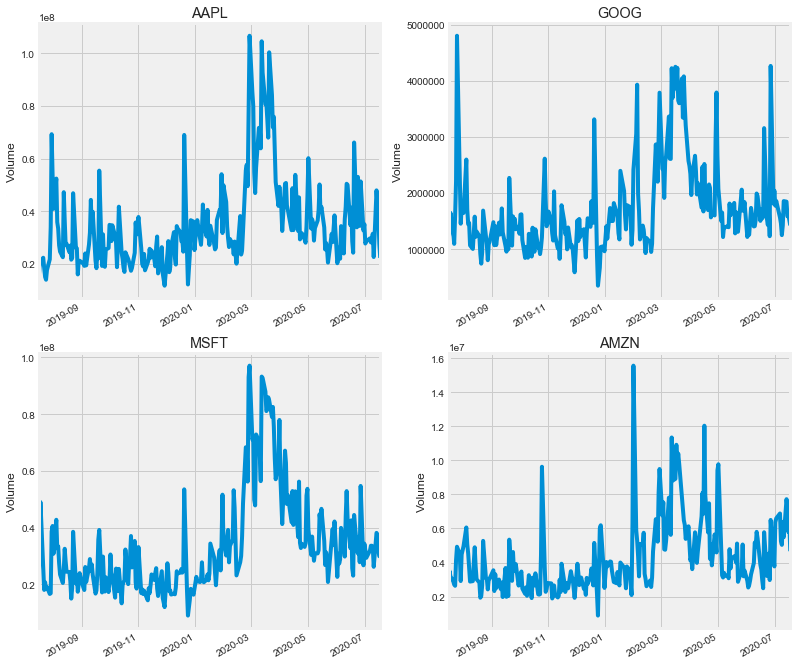

In [21]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")

In [22]:
#an downside in price stock increases the number of volume stock traded during that period. 

In [23]:
#moving average of various stocks

In [25]:
ma_day=[10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name]=company['Adj Close'].rolling(ma).mean()

In [26]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


In [27]:
#plot all the moving averages

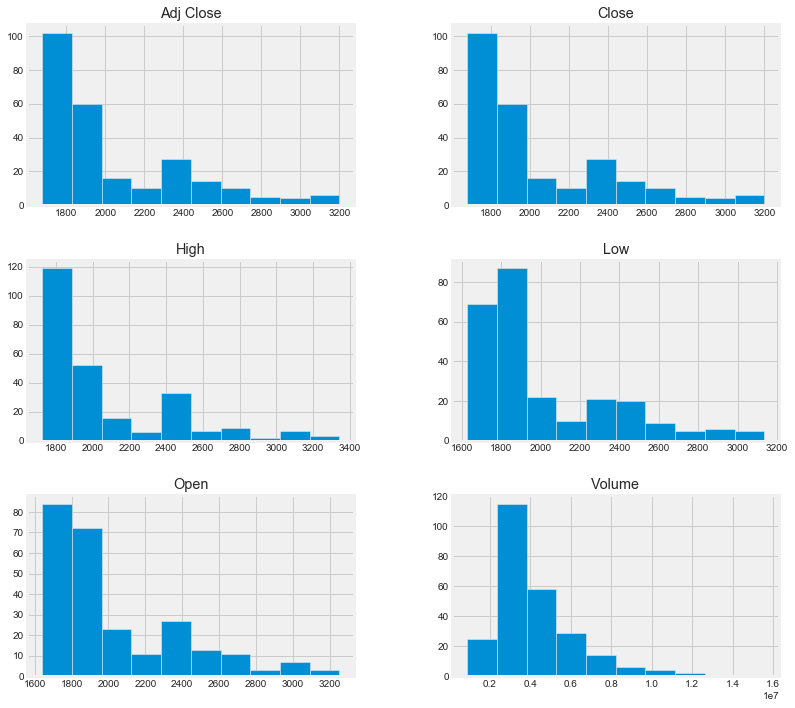

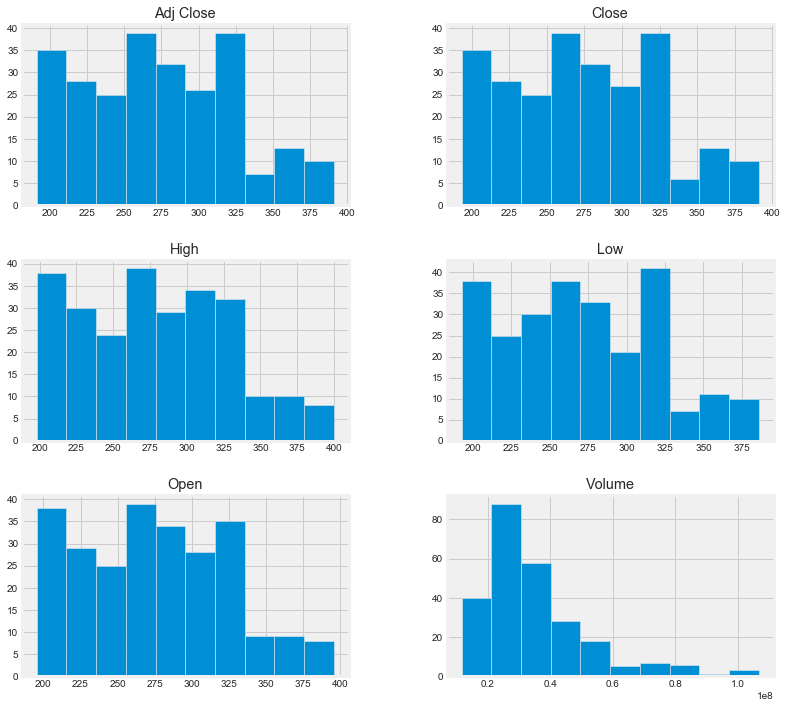

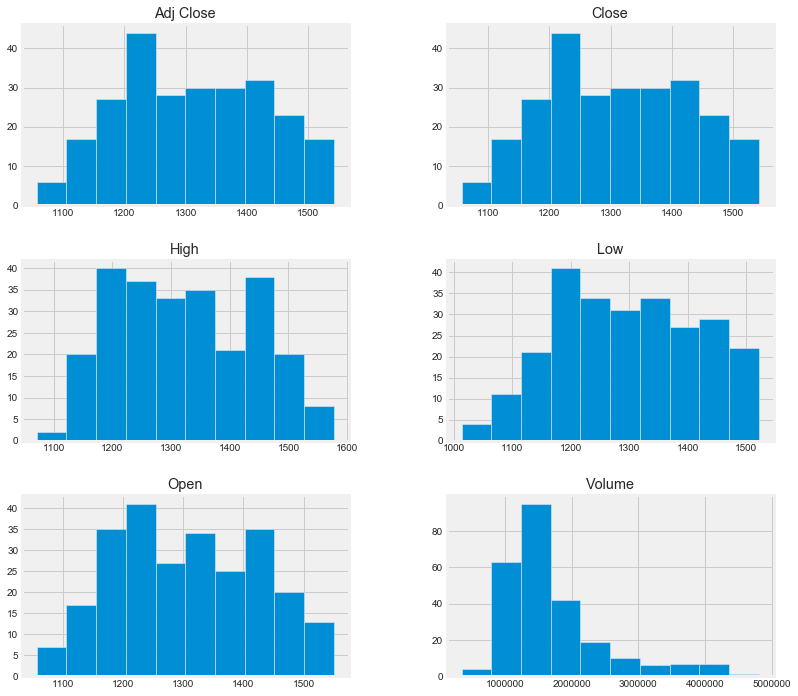

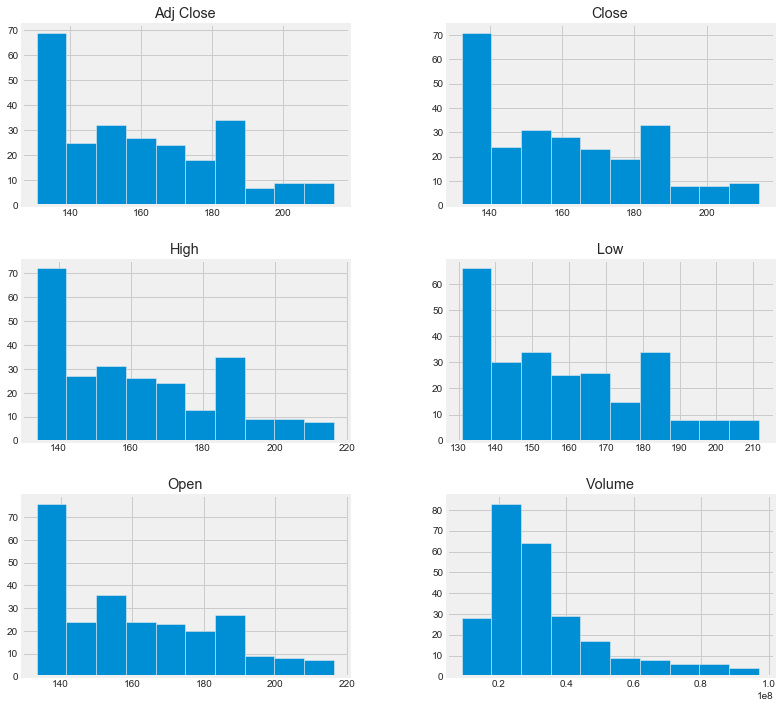

In [29]:
df.groupby('company_name').hist(figsize=(12,12));

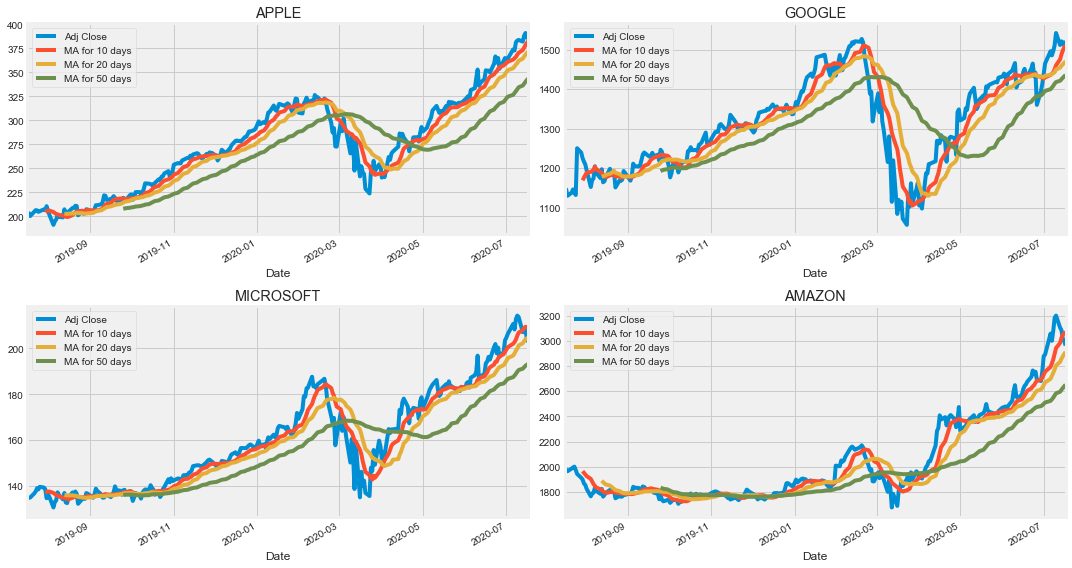

In [31]:
fig, axes =  plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [33]:
#daily return of the stock on average: analyse the risk of the stock but first look at the daily changes in stock
#not only its absolute value

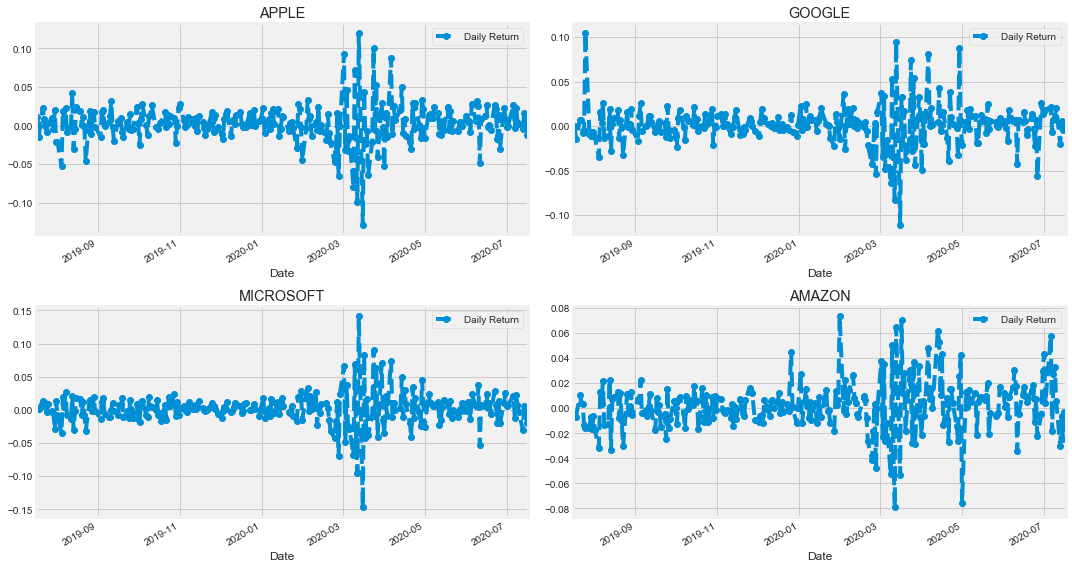

In [40]:
#use of pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
#plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [41]:
#average daily return using a histogram

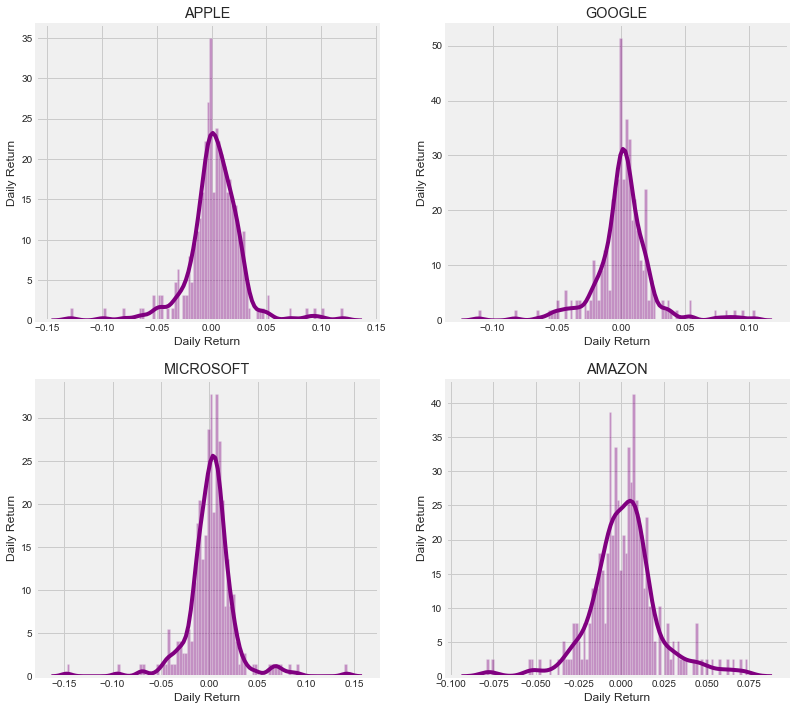

In [43]:
#use of dropna, otherwise Nan values can't be read by seaborn
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
#could use: AAPL['Daily Return'].hist()

In [1]:
#correlation between different stocks using prices

In [7]:
#grab all the closing prices for the tech stock list into one df
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

#lets take a quick look
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-07-19,200.200699,1964.520020,1130.099976,134.959274
2019-07-22,204.776108,1985.630005,1138.069946,136.747269
2019-07-23,206.376984,1994.489990,1146.209961,137.596817
2019-07-24,206.209015,2000.810059,1137.810059,139.009445
2019-07-25,204.578476,1973.819946,1132.119995,138.485886


In [8]:
#make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-07-19,NaN,NaN,NaN,NaN
2019-07-22,0.022854,0.010746,0.007052,0.013248
2019-07-23,0.007818,0.004462,0.007152,0.006213
2019-07-24,-0.000814,0.003169,-0.007328,0.010266
2019-07-25,-0.007907,-0.013490,-0.005001,-0.003766


In [9]:
#comparing the daily percentage return of 2 stocks to check how correlated,

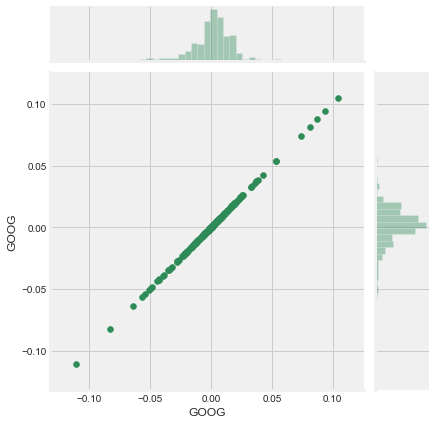

In [11]:
#comparing goog to itself should show how perfectly linear r'ship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

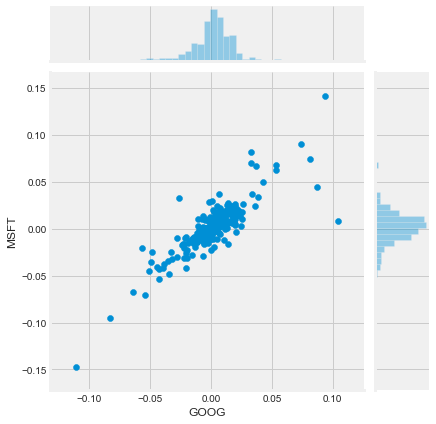

In [12]:
#compare GOOG AND MSFT daily returns using jointplot
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

C:\Users\z\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\z\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


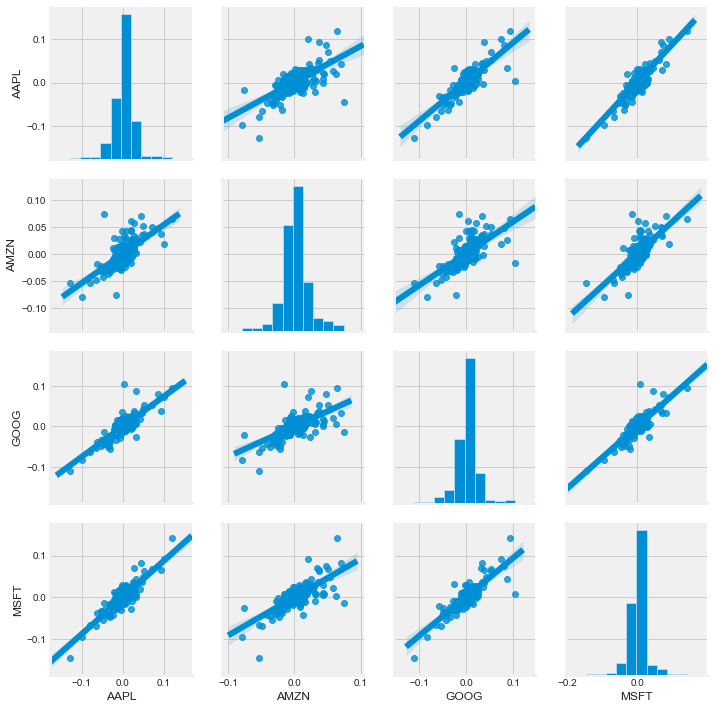

In [14]:
#use pairplot on the df for an automatic visual analysis for all
sns.pairplot(tech_rets, kind='reg')

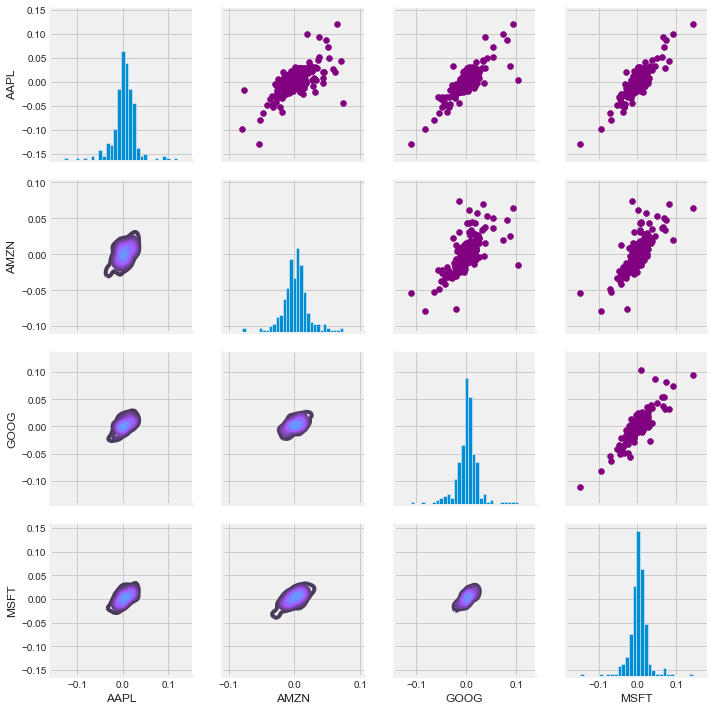

In [15]:
#set up our figure by naming it returns_fig, call pairplot on the df
return_fig = sns.PairGrid(tech_rets.dropna())

#using map_upper we can specify what the upper triangle will look like 
return_fig.map_upper(plt.scatter, color='purple')

#define the lower triangle in the figure, including the plot type(kde)
#or the color map(BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#define the diagnoal as a series of histogram plots of the daily return 
return_fig.map_diag(plt.hist, bins=30)

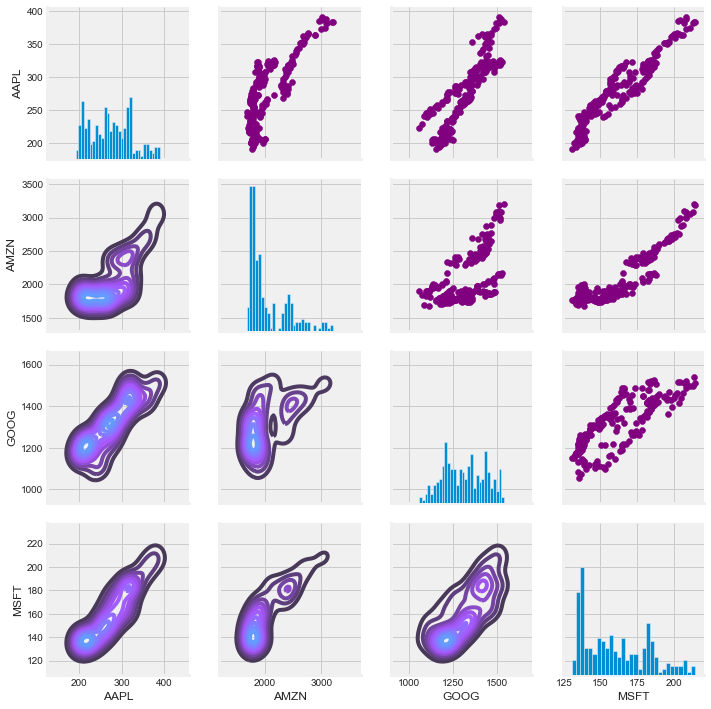

In [16]:
#set up our figure by naming it returns_fig, call pairplot on the df
returns_fig=sns.PairGrid(closing_df)

#using map_upper we can specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter, color='purple')

#we can also define the lower triangle in the figure, including the plot type(kde) or the color map(BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

#define the diagnoal as a series of histogram plots of the deialy return
returns_fig.map_diag(plt.hist, bins=30)

In [17]:
#correlation plot to get actual numeric values for the correlation btn stocks daily returnvalues

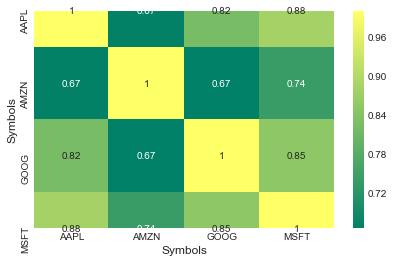

In [20]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

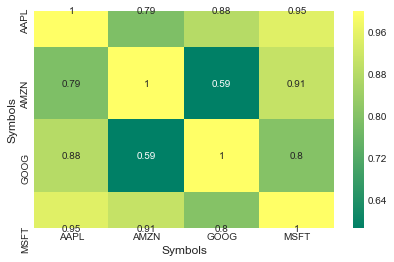

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

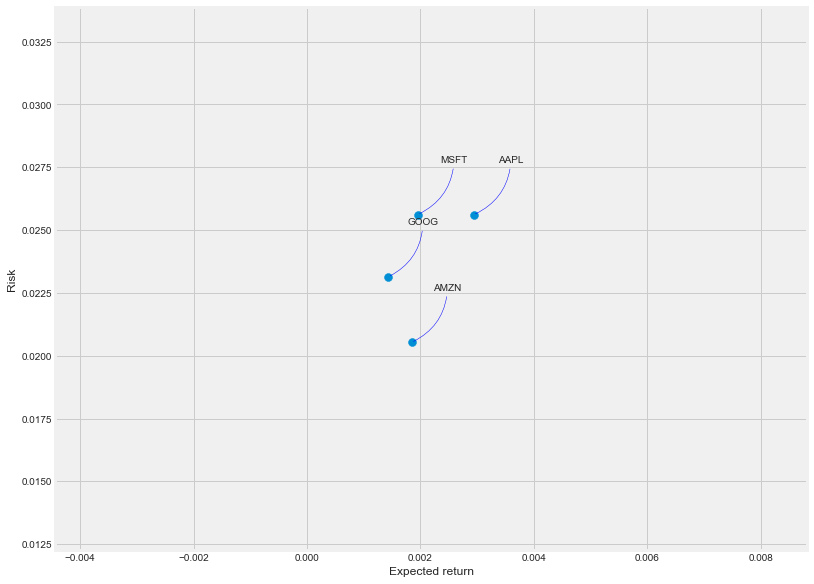

In [24]:
#risk by investing in a particular stock
#comparing the expected return with the standard deviation of the daily returns to quantify risk

#define a new dataframe as a cleaned version of the orginial tech_rets dataframe
rets = tech_rets.dropna()
area = np.pi*20

plt.figure(figsize=(12,10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom',
                    arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'
                ))
    

In [25]:
#predicting stock closing price of APPLE inc

In [26]:
#get the stock quote
df=DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#show tech data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
2012-01-10,60.857143,60.214287,60.844284,60.462856,64549100.0,52.342537
2012-01-11,60.407143,59.901428,60.382858,60.364285,53771200.0,52.257195
2012-01-12,60.414288,59.821430,60.325714,60.198570,53146800.0,52.113747
2012-01-13,60.064285,59.808571,59.957142,59.972858,56505400.0,51.918343


C:\Users\z\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


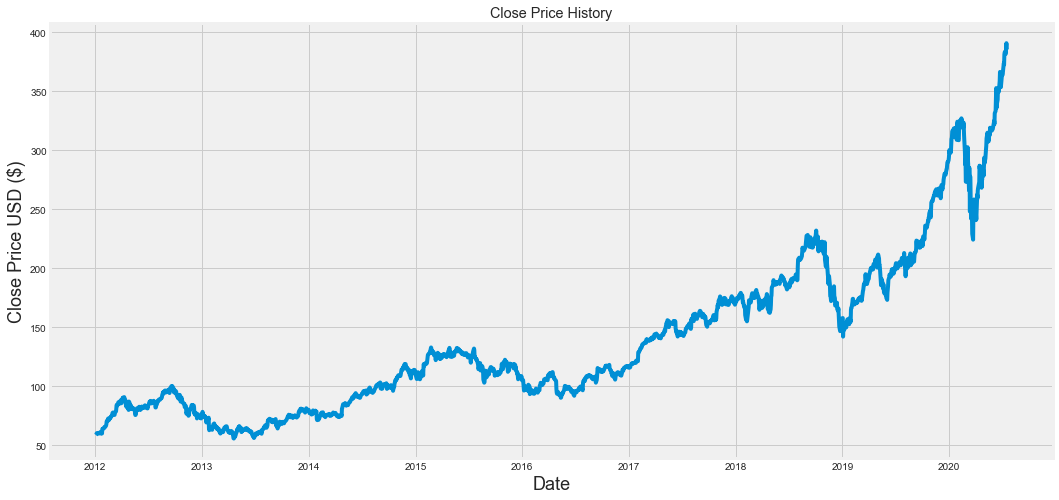

In [27]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
#create a new df with only the close column
data = df.filter(['Close'])

#conver the df to a numpy array
dataset= data.values

#get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

1720

In [29]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00882439],
       [0.00976652],
       [0.01172322],
       ...,
       [1.        ],
       [0.98564651],
       [0.98331892]])

In [31]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
#conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00882439, 0.00976652, 0.01172322, 0.01358616, 0.01330053,
       0.01394424, 0.0136501 , 0.01315559, 0.01248204, 0.01456664,
       0.01644663, 0.01586686, 0.01269093, 0.01572191, 0.01273782,
       0.02392817, 0.02306278, 0.02419248, 0.02663517, 0.02811443,
       0.0279908 , 0.02753467, 0.02947859, 0.03130741, 0.03337923,
       0.03672569, 0.04375536, 0.04386193, 0.04777536, 0.05069976,
       0.04567369, 0.0476091 , 0.04757074, 0.05299753, 0.05222592,
       0.05365401, 0.05622034, 0.05764845, 0.06176224, 0.06475913,
       0.0656245 , 0.06592718, 0.06080307, 0.05956679, 0.05975011,
       0.06456727, 0.06592292, 0.06883453, 0.07569796, 0.08485487,
       0.08314114, 0.0831454 , 0.08976584, 0.09183764, 0.09036265,
       0.08901555, 0.08761303, 0.09227246, 0.09546973, 0.0968083 ])]
[0.09350021151529764]

[array([0.00882439, 0.00976652, 0.01172322, 0.01358616, 0.01330053,
       0.01394424, 0.0136501 , 0.01315559, 0.01248204, 0.01456664,
       0.01644663, 0.01586686, 0.01

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1660/1660 [==============================] - 95s 57ms/step - loss: 3.8264e-04 0s - loss: 3.8292


In [35]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
#create the dta sets _test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse

9.371046157517606

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


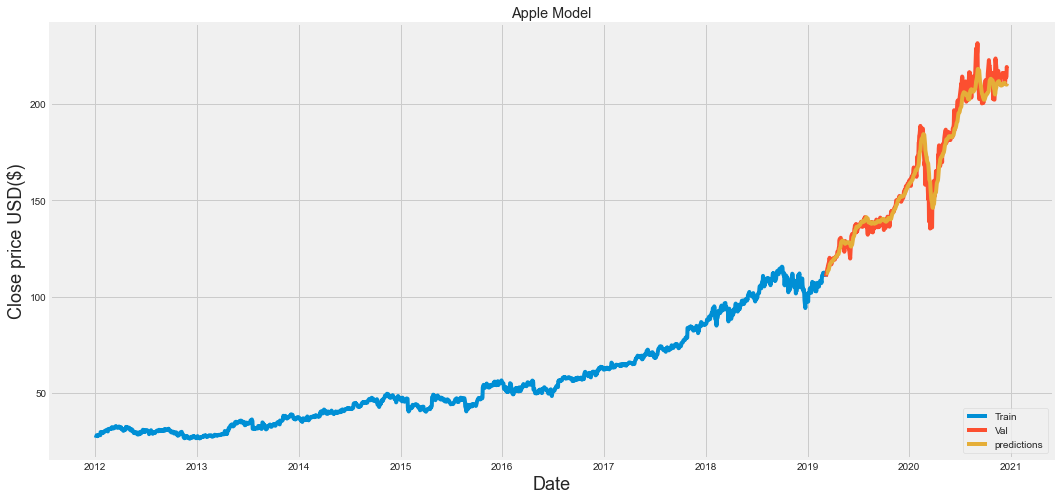

In [39]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [37]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-11-01,222.220001,218.951279
2018-11-02,207.479996,219.646149
2018-11-05,201.589996,218.624451
2018-11-06,203.770004,216.264267
2018-11-07,209.949997,213.949646
2018-11-08,208.490005,212.784332
2018-11-09,204.470001,212.062515
2018-11-12,194.169998,211.104355
2018-11-13,192.229996,208.812027


In [7]:
#predictung stock closing pricr of Amazon

In [8]:
#get the stock quote
df=DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
2012-01-10,182.399994,177.100006,181.100006,179.339996,3985800,179.339996
2012-01-11,180.770004,178.190002,179.639999,178.899994,3102700,178.899994
2012-01-12,179.490005,175.750000,179.419998,175.929993,5385800,175.929993
2012-01-13,178.800003,173.500000,175.809998,178.419998,4753500,178.419998


C:\Users\z\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


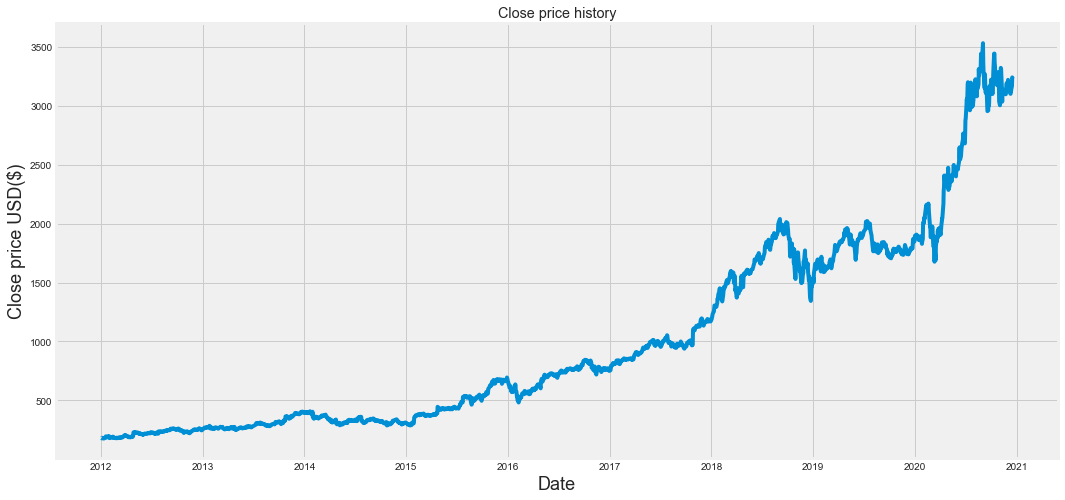

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.show()

In [10]:
#create a new df wiht only the close column
data = df.filter(['Close'])

#convert the df to a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

1805

In [11]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.23852679e-04],
       [4.70866468e-04],
       [5.00669928e-04],
       ...,
       [8.90827699e-01],
       [9.13429217e-01],
       [9.10910993e-01]])

In [12]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#split the data into x_train & y_train data sets
x_train =[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
#convert the x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00447025, 0.00302785, 0.00329904,
       0.00353746, 0.00518251, 0.00579344, 0.00483383, 0.00551629,
       0.001052  , 0.00172552, 0.00350169, 0.0021487 , 0.00246162,
       0.00284606, 0.00269705, 0.00286394, 0.00466694, 0.00458052,
       0.00254506, 0.00119207, 0.00195797, 0.00188644, 0.00138578,
       0.00088213, 0.00095366, 0.00077484, 0.00234539, 0.00112054,
       0.00122485, 0.00100432, 0.00129041, 0.00153777, 0.00233645,
       0.00348977, 0.00250036, 0.0022232 , 0.00258082, 0.00188644,
       0.00253314, 0.00271791, 0.00285798, 0.00488747, 0.00470866,
       0.00490833, 0.00569509, 0.00802856, 0.00879447, 0.00751896])]
[0.00854711290330825]

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1745/1745 [==============================] - 103s 59ms/step - loss: 5.9630e-04


In [23]:
#create the testing data set 
#create the new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test & y_trst
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
#Convert the data to a numpy array
x_test=np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#get the modesl predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse

158.37196164444384

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


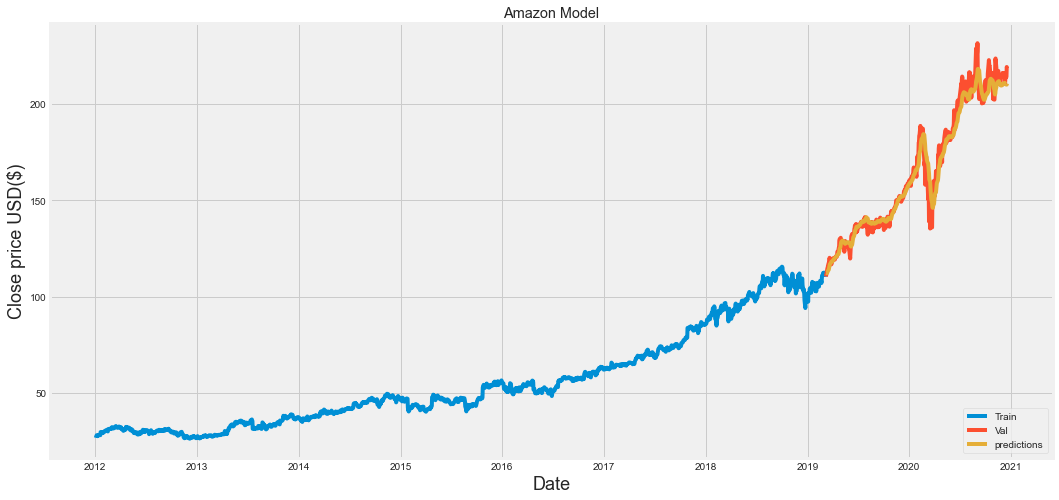

In [40]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Amazon Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [27]:
valid

,Close,Predictions
Date,,
2019-03-08,1620.800049,1791.104370
2019-03-11,1670.619995,1789.213501
2019-03-12,1673.099976,1789.275757
2019-03-13,1690.810059,1790.473511
2019-03-14,1686.219971,1793.860474
2019-03-15,1712.359985,1797.908936
2019-03-18,1742.150024,1804.391846
2019-03-19,1761.849976,1814.374756
2019-03-20,1797.270020,1827.393188


In [28]:
#predict stock closing price for Microsoft


In [29]:
#get the stock quote
df=DataReader('MSFT', data_source='yahoo', start='2012-01-01', end=datetime.now())
#show tech data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.849474
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.363672
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.592201
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.943169
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.641172
2012-01-10,28.150000,27.750000,27.930000,27.840000,60014400.0,22.722795
2012-01-11,27.980000,27.370001,27.430000,27.719999,65582400.0,22.624851
2012-01-12,28.020000,27.650000,27.870001,28.000000,49370800.0,22.853386
2012-01-13,28.250000,27.790001,27.930000,28.250000,60196100.0,23.057436


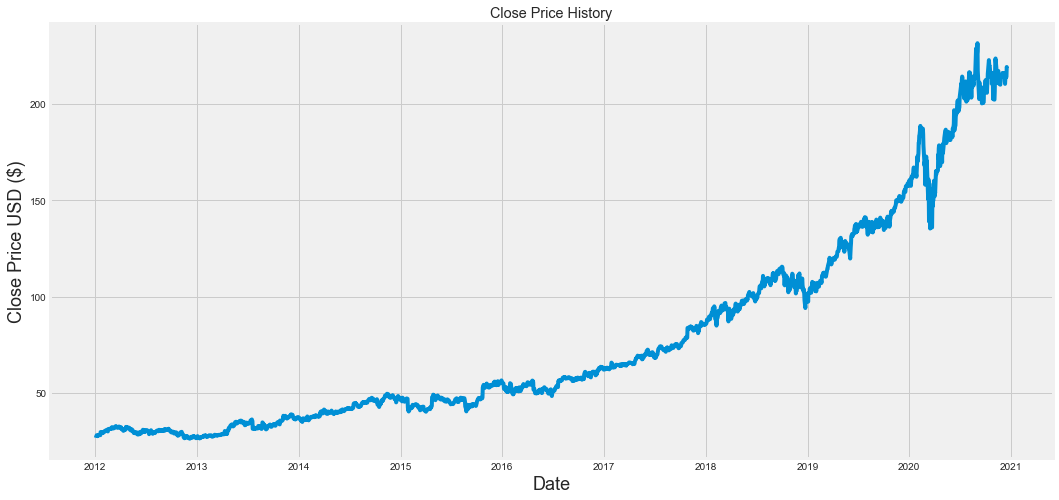

In [30]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
#create a new df with only the close column
data = df.filter(['Close'])

#conver the df to a numpy array
dataset= data.values

#get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

1805

In [32]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00194856],
       [0.00501753],
       [0.00638153],
       ...,
       [0.91465321],
       [0.93974086],
       [0.93736262]])

In [33]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
#conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.01627045, 0.01636788, 0.01446804,
       0.01553974, 0.01524746, 0.01393218, 0.01578332, 0.01539361,
       0.0171473 , 0.01743959, 0.01885229, 0.01865744, 0.01938815,
       0.02089828, 0.02143414, 0.02011886, 0.02050857, 0.01890101,
       0.01792673, 0.02396727, 0.02377241, 0.02469797, 0.02386984,
       0.02435698, 0.02489282, 0.02425955, 0.02679267, 0.02615939,
       0.02883866, 0.02781567, 0.02645167, 0.02528254, 0.02664653,
       0.02747466, 0.02737724, 0.02762081, 0.03068978, 0.03117693,
       0.03156663, 0.03034878, 0.02840023, 0.02737724, 0.02698753,
       0.02742595, 0.02747466, 0.03030008, 0.02995908, 0.02835151])]
[0.028010513869453108]

[array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.0

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1745/1745 [==============================] - 92s 52ms/step - loss: 2.8343e-04


In [36]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse

5.537793742454617

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


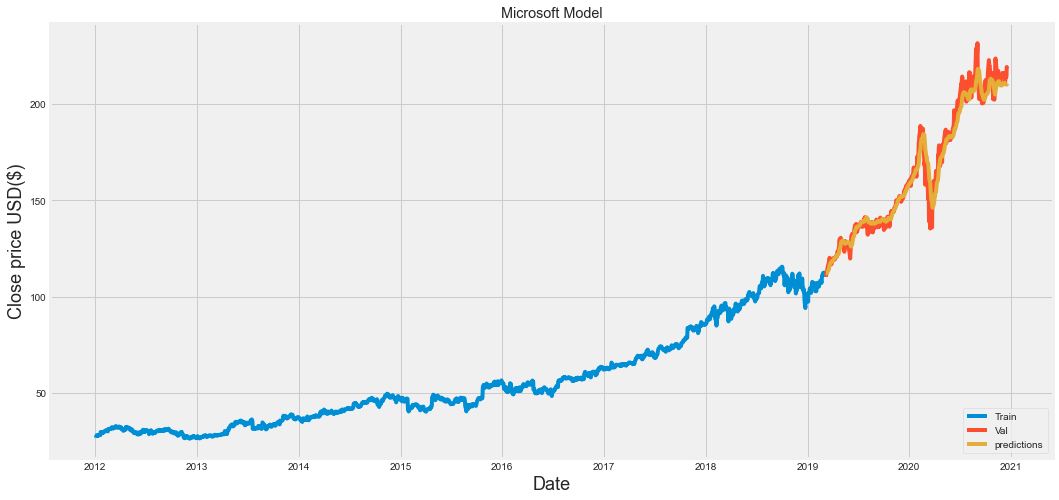

In [38]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [41]:
#get the stock quote
df=DataReader('GOOG', data_source='yahoo', start='2012-01-01', end=datetime.now())
#show tech data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380500.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749400.0,332.892242
2012-01-05,330.745300,326.889740,329.828735,328.274536,6590300.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405900.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688800.0,310.067780
2012-01-10,315.716614,307.303162,313.699188,310.406525,8824000.0,310.406525
2012-01-11,313.519836,309.400299,310.585846,311.811249,4817800.0,311.811249
2012-01-12,315.263306,312.080261,314.431427,313.644379,3764400.0,313.644379
2012-01-13,312.304413,309.370392,311.960693,311.328064,4631800.0,311.328064


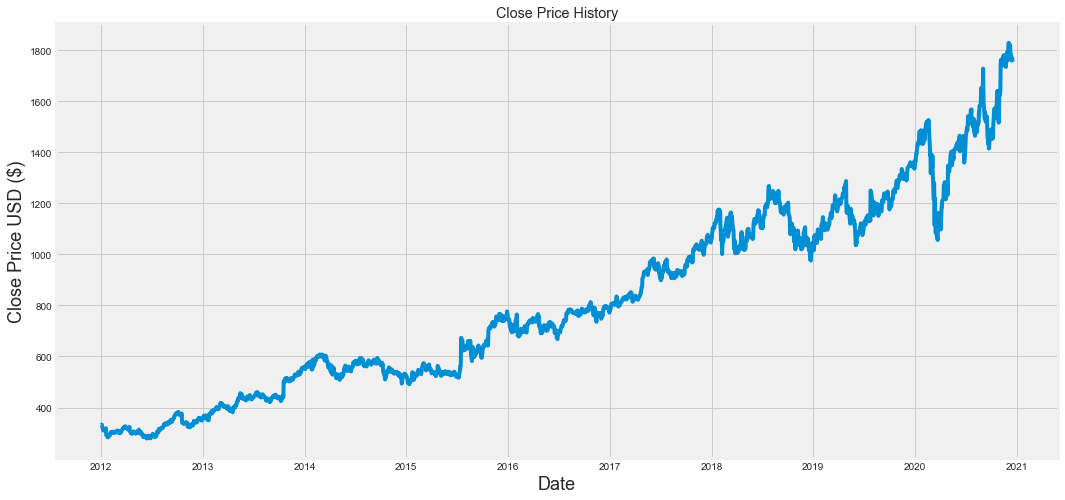

In [42]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [43]:
#create a new df with only the close column
data = df.filter(['Close'])

#conver the df to a numpy array
dataset= data.values

#get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

1805

In [44]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03419239],
       [0.03511504],
       [0.03213494],
       ...,
       [0.96113609],
       [0.95805768],
       [0.95367239]])

In [45]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
#conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.03419239, 0.03511504, 0.03213494, 0.02924485, 0.02038492,
       0.02060353, 0.02151009, 0.02269313, 0.02119826, 0.02235237,
       0.02374437, 0.02588542, 0.00866062, 0.00850952, 0.00703395,
       0.00335624, 0.00290938, 0.00672854, 0.00599236, 0.00677033,
       0.00700179, 0.00837772, 0.0119847 , 0.01608676, 0.01534093,
       0.0163311 , 0.01684866, 0.01506447, 0.01708656, 0.01630216,
       0.01495195, 0.01526057, 0.01465619, 0.01766521, 0.01571706,
       0.01512875, 0.01634717, 0.01615748, 0.0190765 , 0.0190315 ,
       0.02036564, 0.01999594, 0.01774559, 0.01475906, 0.01535058,
       0.01545989, 0.01324491, 0.01482013, 0.01888042, 0.01830497,
       0.01995736, 0.02121433, 0.02408835, 0.02393082, 0.02601721,
       0.0279686 , 0.02685628, 0.02902303, 0.02828043, 0.03109014])]
[0.02872726667553599]

[array([0.03419239, 0.03511504, 0.03213494, 0.02924485, 0.02038492,
       0.02060353, 0.02151009, 0.02269313, 0.02119826, 0.02235237,
       0.02374437, 0.02588542, 0.00

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1745/1745 [==============================] - 96s 55ms/step - loss: 8.3256e-04


In [47]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
#create the dta sets _test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse

66.74172232092808

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


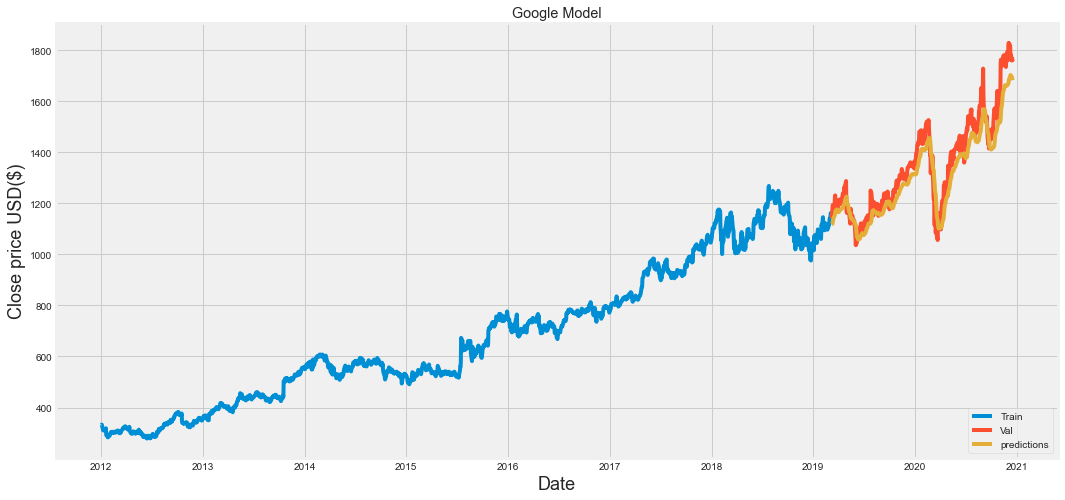

In [49]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Google Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()